<a href="https://colab.research.google.com/github/JuniorHZ19/ML/blob/main/convolucionTerminadoAhorasiProbar4.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@markdown # *0) ** Instalando libreria(OBLIGATORIO)

!pip install torch torchvision torchaudio

In [3]:
#@markdown # *1) ** Descargando DataSet  de perros y gatos(OBLIGATORIO)
import zipfile

nombre_zip="data_set_dogcat.zip"

directorio_destino="/content/"

!gdown --id 19u9sy2053Ds739lyYSJut6S_k54trLnd -O {nombre_zip}

with zipfile.ZipFile(nombre_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)



/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19u9sy2053Ds739lyYSJut6S_k54trLnd
To: /content/data_set_dogcat.zip
100% 826M/826M [00:14<00:00, 58.7MB/s]


In [4]:
#@markdown # *1) ** Clase Para manejo de directorios de datasets de imagenes


import os
import cv2
import pandas as pd
from PIL import Image
# Recorre el directorio  y elmiina los archvios que no tiene las extensioens permitidas

class DataSetManage:

 def comprobar_ext_directorios(self,directorio):

  for clase,[directorio,etiquetas] in(directorios.items()):
   lista_directorio=os.listdir(directorio)
   self.validarExt(directorio)



 def  validarExt(self,directorio):
  print(directorio)
   # Extensiones permitidas
  extensiones_permitidas = {".jpg", ".jpeg", ".png"}
  for root, dirs, files in os.walk(directorio):

    for file in files:
        # Obtiene la extensión del archivo
        _, extension = os.path.splitext(file)

        # Verifica si la extensión no está en la lista de extensiones permitidas y elimina el archivo
        if extension.lower() not in extensiones_permitidas:
            archivo_a_eliminar = os.path.join(root, file)
            os.remove(archivo_a_eliminar)
            print(f"Se eliminó: {archivo_a_eliminar}")


# Cambia nombre de cada archivo dentro del directorio a un valor secuencial

 def cambiar_nombres_directorios(self,directorio):
   for clase,[directorio,etiquetas] in(directorios.items()):
     lista_directorio=os.listdir(directorio)
     self.cambiarNombre(directorio,clase)


 def cambiarNombre(self,directorio,subfijo):
  archivos_en_directorio = os.listdir(directorio)
  for i, archivo in enumerate(archivos_en_directorio, start=1):
    # Construir el nuevo nombre del archivo
    nuevo_nombre = f"{subfijo}{i}{os.path.splitext(archivo)[1]}"

    # Ruta completa del archivo antiguo y nuevo
    ruta_antigua = os.path.join(directorio, archivo)
    ruta_nueva = os.path.join(directorio, nuevo_nombre)

    # Cambiar el nombre del archivo
    os.rename(ruta_antigua, ruta_nueva)
    print(f"Se cambió el nombre de {ruta_antigua} a {ruta_nueva}")


#Obtiene la cantidad de elemntos que tiene la carpeta

 def len_directorio(self,directorio):
    cantidad_elementos = sum(1 for elemento in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, elemento)))
    return cantidad_elementos


#----------------------------------------------------------------------------------------------

#Valida si la imagen se puede leer usando  pill o cv2 si no se puede leer se elimina

 def validar_Img_Pill(self,directorio,):
  for etiqueta,[directorio,clase] in(directorios.items()):

    lista_paths=os.listdir(directorio)
    self.validarLecturaImgPill(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")

 def validar_Img_cv2(self,directorio):
  for etiqueta,[directorio,clase] in(directorios.items()):

    lista_paths=os.listdir(directorio)
    self.validarLecturaImg(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")


 def validarLecturaImg(self,directorio,lista):

  for ruta in(lista):
   imagen=cv2.imread(directorio+ruta)
   if  imagen is None:
     os.remove(directorio+ruta)
     print(f"No se pudo leer y se elimino archivo:{directorio+ruta}")

 def validarLecturaImgPill(self,directorio,lista):
    for ruta in(lista):
     try:
      imagen=Image.open(directorio+ruta)
     except Exception as e:
      os.remove(directorio+ruta)
      print(f"Archivo '{directorio+ruta}' eliminado.")



#vamos a recorrer el dicionario y validar ruta por ruta si se puede leer sino se elminara
#vamos guaradno al mismo tiempo 3 listas, los directorios , listas de paths de los directiros y de las clases ,para usarlo luego usarlo al crear el csv

 def separar_datos_directorios(self,directorios):
  listas_directorios=[]
  listas_listas_directorios=[]
  listas_clases=[]

  for etiqueta,[directorio,clase] in(directorios.items()):

       lista_paths=os.listdir(directorio)
       listas_directorios.append(directorio)
       listas_listas_directorios.append(lista_paths)
       listas_clases.append(clase)

  return listas_directorios,listas_listas_directorios,listas_clases

 def emparejar_listas_paths(self,lista_listas):

   #Tomamos el minimo tamaño dentro de las lista de cada clase
   tamaño_minimo = min(len(arr) for arr in lista_listas)

   #Vamos a emparejar todas las listas con un tamaño igual que sea la del minimo tamaño de todas,esto para tener un set de datos parejo por cada clase
   Reducido_lista_paths=[]

   #Reduce cada lista de los paths a la cantidad minimo para que todos tenga iaugal cantidad
   for listas in(listas_paths_directorios):
    Reducido_lista_paths.append(listas[:tamaño_minimo])

   return Reducido_lista_paths
#---------------------------------------------------------------------------------


 def crear_paths_csv(self,directorio_base,lista_paths,clases,nombre_archivo):

   columnas=["path","etiqueta"]
   datos_csv=[]

   for dir_base,dir_path,clase in  zip(directorio_base,lista_paths,clases):

    for path  in (dir_path):

     datos_csv.append([dir_base+path ,clase])


   df_lista=pd.DataFrame(datos_csv,columns=columnas)
   df_lista.to_csv(nombre_archivo,index=False)
   print("Csv Creado")
#---------------------------------------------------------------------------------

#devuelve cuatnos elemtnos tiene cada clase
 def total_elementos(self,directorio,csv_path):
    df=pd.read_csv(csv_path)
    for clase,[directorio,etiqueta] in (directorios.items()):
     tamaño_etiqueta=(df["etiqueta"] == etiqueta).sum()
     print(f"la clase {clase} tiene :{tamaño_etiqueta} elementos")



In [5]:
#@markdown # *1) ** Creacion de el csv de los path y clases(OBLIGATORIO)

dmg=DataSetManage()

directorios={
     "gato":["/content/PetImages/Cat/",0],
     "perro":["/content/PetImages/Dog/",1],
}


dmg.comprobar_ext_directorios(directorios)

dmg.cambiar_nombres_directorios(directorios)

dmg.validar_Img_Pill(directorios)

listas_directorios,listas_paths_directorios,listas_clases=dmg.separar_datos_directorios(directorios)

Reducido_lista_paths=dmg.emparejar_listas_paths(listas_paths_directorios)
#validamos que todas las iamgnes en nuestro direcotrios puedan abrirse con openia cv2



#La funcion que creamos para podre crear nuestro csv , con los parametros antes calucaldos que son 3 listas y el nombre del csv

Dataset_csv="Data_set.csv" #nombre que tendla nuestlo csv
dmg.crear_paths_csv(listas_directorios,Reducido_lista_paths,listas_clases,Dataset_csv)

#imprime total de elemtnos por clase
dmg.total_elementos(directorios,"/content/Data_set.csv")


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Se cambió el nombre de /content/PetImages/Dog/5586.jpg a /content/PetImages/Dog/perro7502.jpg
Se cambió el nombre de /content/PetImages/Dog/2621.jpg a /content/PetImages/Dog/perro7503.jpg
Se cambió el nombre de /content/PetImages/Dog/3943.jpg a /content/PetImages/Dog/perro7504.jpg
Se cambió el nombre de /content/PetImages/Dog/5715.jpg a /content/PetImages/Dog/perro7505.jpg
Se cambió el nombre de /content/PetImages/Dog/2131.jpg a /content/PetImages/Dog/perro7506.jpg
Se cambió el nombre de /content/PetImages/Dog/625.jpg a /content/PetImages/Dog/perro7507.jpg
Se cambió el nombre de /content/PetImages/Dog/6136.jpg a /content/PetImages/Dog/perro7508.jpg
Se cambió el nombre de /content/PetImages/Dog/2649.jpg a /content/PetImages/Dog/perro7509.jpg
Se cambió el nombre de /content/PetImages/Dog/7825.jpg a /content/PetImages/Dog/perro7510.jpg
Se cambió el nombre de /content/PetImages/Dog/3390.jpg a /content/PetImages/Dog/perro751

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Archivo '/content/PetImages/Dog/perro6340.jpg' eliminado.
Se ah validado todas las imagenes
Csv Creado
la clase gato tiene :12499 elementos
la clase perro tiene :12499 elementos


In [6]:
#@markdown # *2) ** Creacion de clase DATASET(OBLIGATORIO)
import torch
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import numpy as np
import cv2
from PIL import Image


class MiDataSet(Dataset):

  def __init__(self,csv_file, transform=None):


     self.data=pd.read_csv(csv_file)

     self.x=self.data["path"]
     self.y=self.data["etiqueta"]

     self.transform=transform

     self.samples=self.data["path"].shape[0]

  def __getitem__(self,id):

    rut_imagen=self.x[id]
    imagen=cv2.imread(rut_imagen)
    etiqueta=self.y[id]


    if imagen is None:
      pillow_image = Image.open(rut_imagen)
      numpy_image = np.array(pillow_image)
      imagen=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)


    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


    if self.transform:
      imagen_rgb = self.transform(imagen_rgb)

    return imagen_rgb,etiqueta


  def __len__(self):
   return self.samples





In [10]:

#@markdown # *3) ** Separacion dos archivos difentes para entrenamietno y prueba(OBLIGATORIO)

from sklearn.model_selection import train_test_split

misdatos=pd.read_csv("/content/Data_set.csv")
# Separo mis datos en entrenamiento y test

etiquetas=misdatos["etiqueta"]
datos_entrenamiento, datos_evaluacion = train_test_split(misdatos, test_size=0.3, random_state=42,stratify=etiquetas)


# Guardar los dos conjuntos en archivos CSV separados
datos_entrenamiento.to_csv("/content/datos_entrenamiento.csv", index=False)
datos_evaluacion.to_csv("/content/datos_evaluacion.csv", index=False)




/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


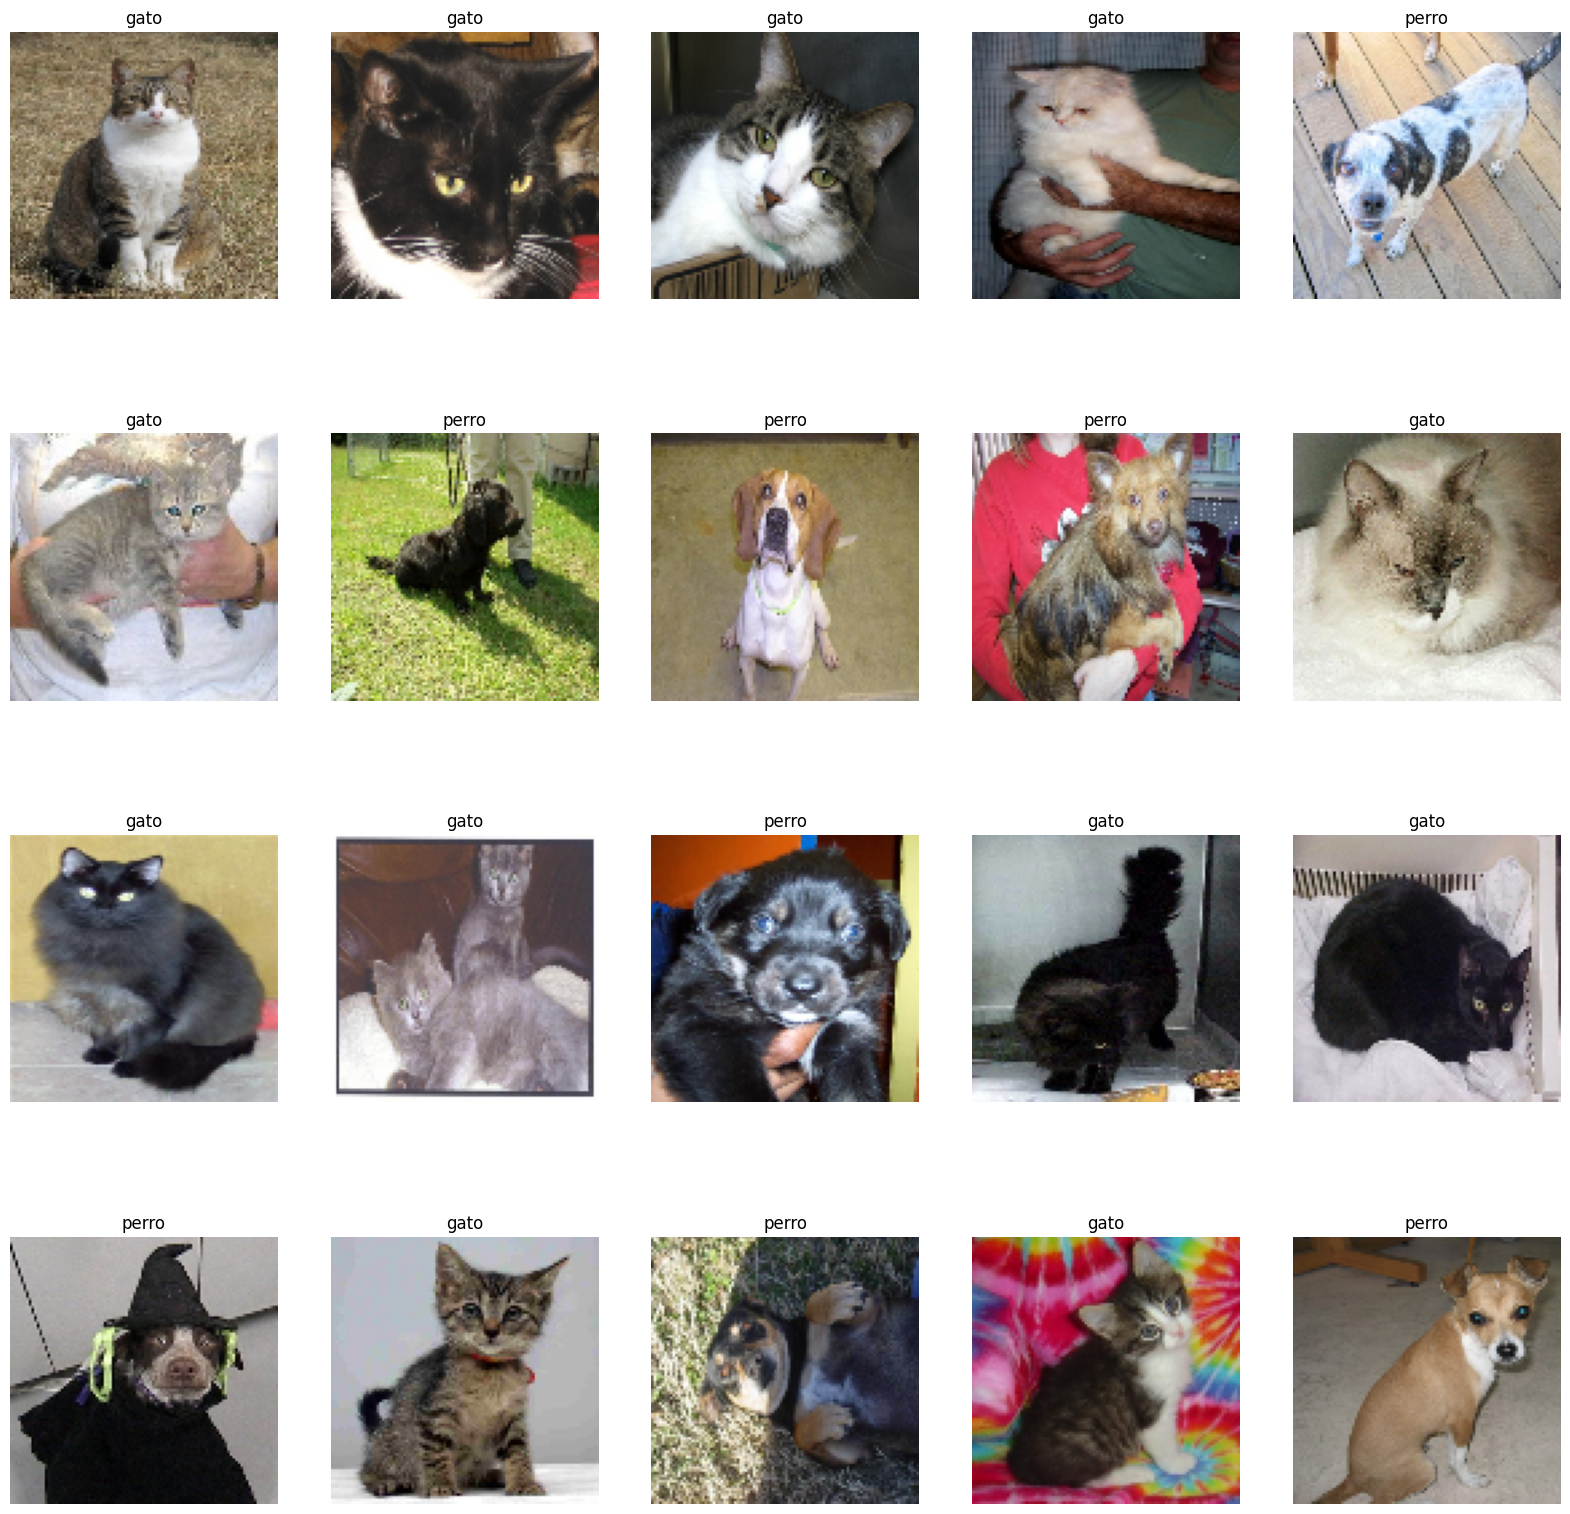

In [8]:
#@markdown # *2) ** Mostrar 20 muestras(Opcional)
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image


# Definir transformaciones
transformaciones = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((100, 100))
])

# Crear dataset y DataLoader
muestra = MiDataSet("/content/Data_set.csv", transformaciones)
data_muestra = DataLoader(muestra, batch_size=20, shuffle=True)

# Obtener el primer lote
primer_lote = next(iter(data_muestra))
tensor_imagenes, tensor_etiquetas = primer_lote

# Mapeo de etiquetas numéricas a etiquetas de texto
mapeo_etiquetas = {0: 'gato', 1: 'perro'}
etiquetas_texto = [mapeo_etiquetas[item.item()] for item in tensor_etiquetas]

# Crear una figura y subgráficos
fig, axs = plt.subplots(4, 5, figsize=(20, 20))

# Iterar sobre las imágenes del lote
for i in range(4):
    for j in range(5):
        idx = i * 5 + j
        imagen = tensor_imagenes[idx].permute(1, 2, 0)
        etiqueta_texto = etiquetas_texto[idx]

        # Mostrar la imagen en el subgráfico correspondiente
        axs[i, j].imshow(imagen)
        axs[i, j].set_title(etiqueta_texto)
        axs[i, j].axis('off')

plt.show()


In [11]:
import sklearn
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

transformaciones = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Resize((100, 100),antialias=True)
])


mis_datos_entrenamiento=MiDataSet("/content/datos_entrenamiento.csv",transform=transformaciones)

mis_datos_test=MiDataSet("/content/datos_evaluacion.csv",transform=transformaciones)


data_por_lote_entrenamiento=DataLoader(mis_datos_entrenamiento,batch_size=100,shuffle=True)

data_por_por_lote_test=DataLoader(mis_datos_test,batch_size=100,shuffle=True)







In [21]:
import torch.nn as nn



In [19]:
import torch.nn as nn
import torch.nn.functional as F


class RedConvolucional(nn.Module):

   def __init__(self):
    super(RedConvolucional,self).__init__()

#Red convolulcional

    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, stride=1)

    self.conv2=nn.Conv2d(in_channels=32,out_channels=40,kernel_size=3, stride=2)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3=nn.Conv2d(in_channels=40,out_channels=48,kernel_size=3, stride=2)

    self.flatten=nn.Flatten()

#Red fully conected o multicapa convecional

    self.capa_oculta1=nn.Linear(11*11*48,1000)
    self.capa_oculta2=nn.Linear(1000,800)
    self.capa_salida=nn.Linear(800,2)


   def forward(self,x):
    #Capa convolucionales
     x=self.conv1(x)
     x=F.relu(x)

     x=self.conv2(x)
     x=F.relu(x)
     x=self.maxpool1(x)

     x=self.conv3(x)
     x=F.relu(x)


     x=self.flatten(x)

#Capa fully conected
     x=self.capa_oculta1(x)
     x=F.relu(x)
     x=self.capa_oculta2(x)
     x=F.relu(x)

     x=self.capa_salida(x)
     x=F.softmax(x,dim=1)
     return x


In [ ]:
import torch
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


#funcion clasificador:
def clasificador(y_pred_test):
    max_indices = torch.argmax(y_pred_test, dim=1)
    return max_indices

#funcion acutity:
def accurity(y_test, y_real):
    correctos = torch.eq(y_test, y_real).sum().item()
    return correctos / len(y_test)


# Solo para re entrenar
# state_dict = torch.load('/content/modelo_gatoperro2.pt')
# ModeloRC.load_state_dict(state_dict)
# ModeloRC=ModeloRC.to(device)


def EntrenamientoCNN(modelo,optimisador,criterio,epocas,datos_loader_train,datos_loader_eval):

 df=pd.DataFrame(columns=["accuracy","loss","epoch"])

 if torch.cuda.is_available():
    print("CUDA está disponible.")
    device = torch.device("cuda")
 else:
    print("CUDA no está disponible. Se utilizará la CPU.")
    device = torch.device("cpu")

 modelo.to(device)

 for epoch in range(epocas):

    total_train_loss = 0.0
    num_train_batches = len(datos_loader_train)
    modelo.train()

    for i, (xi, yi) in enumerate(datos_loader_train):
        xi, yi = xi.to(device), yi.to(device)
        y_predict = modelo(xi)
        loss = criterio(y_predict, yi)
        optimisador.zero_grad()
        loss.backward()
        optimisador.step()
        optimisador.zero_grad()
        total_train_loss += loss.item()

    modelo.eval()
    with torch.no_grad():
        total_test_accuracy = 0.0
        num_test_batches = len(datos_loader_eval)

        for i, (xi, yi) in enumerate(datos_loader_eval):
            xi, yi = xi.to(device), yi.to(device)
            y_predict_test = modelo(xi)
            y_predic_test_clasificado = clasificador(y_predict_test)
            Precision = accurity(y_predic_test_clasificado, yi)
            total_test_accuracy += Precision

    avg_test_accuracy = total_test_accuracy / num_test_batches
    avg_train_loss = total_train_loss / num_train_batches

    fila={"accuracy":avg_test_accuracy,"loss":avg_train_loss,"epoch":epoch}
    #df=df.append(fila, ignore_index=True)
    df = pd.concat([df, pd.DataFrame([fila])], ignore_index=True)

    print(f'Epoca[{epoch + 1}], Perdida: {avg_train_loss:.4f}, Accuracy:{avg_test_accuracy:.4f}')

 plt.plot(df["epoch"],df["accuracy"],label="Accurity",color='b')
 plt.plot(df["epoch"],df["loss"],label="Loss",color='r')
 plt.title('Loss vs Accuracy')
 plt.legend()
 plt.show()

ModeloRC=RedConvolucional()
optimizer=optim.Adam(ModeloRC.parameters(),lr=0.001)
criterio=nn.CrossEntropyLoss()
epochs=15

modeloREdCon = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=40, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=40, out_channels=48, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(11 * 11 * 48, 1000),
            nn.ReLU(),
            nn.Linear(1000, 800),
            nn.ReLU(),
            nn.Linear(800, 2),
            nn.Softmax(dim=1)
        )

EntrenamientoCNN(modeloREdCon,optimizer,criterio,epochs,data_por_lote_entrenamiento,data_por_por_lote_test)

torch.save(ModeloRC.state_dict(), 'modelo_gatoperro.pt')


CUDA está disponible.
Epoca[1], Perdida: 0.6932, Accuracy:0.5000
Epoca[2], Perdida: 0.6932, Accuracy:0.5000
Epoca[3], Perdida: 0.6932, Accuracy:0.5000


CUDA está disponible.
Epoca[1], Perdida: 0.3635, Accuracy:0.7900
Epoca[2], Perdida: 0.3550, Accuracy:0.7819
Epoca[3], Perdida: 0.3570, Accuracy:0.7873
Epoca[4], Perdida: 0.3539, Accuracy:0.7865
Epoca[5], Perdida: 0.3573, Accuracy:0.7613
Epoca[6], Perdida: 0.3519, Accuracy:0.7744
Epoca[7], Perdida: 0.3538, Accuracy:0.7764
Epoca[8], Perdida: 0.3528, Accuracy:0.7751
Epoca[9], Perdida: 0.3498, Accuracy:0.7815
Epoca[10], Perdida: 0.3506, Accuracy:0.7829


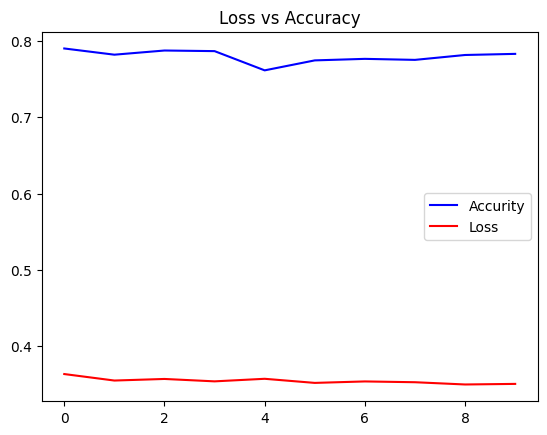

In [16]:
ModeloRC=RedConvolucional()
state_dict = torch.load('/content/modelo_gatoperro.pt')
ModeloRC.load_state_dict(state_dict)
ModeloRC=ModeloRC.to(device)
optimizer=optim.Adam(ModeloRC.parameters(),lr=0.001)
criterio=nn.CrossEntropyLoss()
epochs=10
EntrenamientoCNN(ModeloRC,optimizer,criterio,epochs,data_por_lote_entrenamiento,data_por_por_lote_test)

CUDA está disponible.


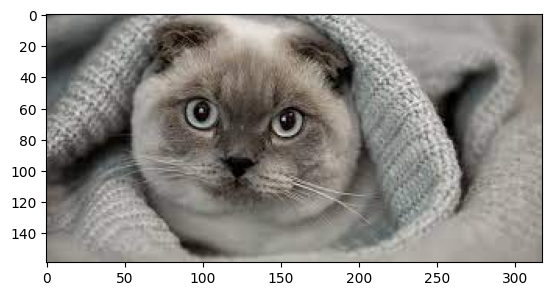

RedConvolucional(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 40, kernel_size=(3, 3), stride=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(40, 48, kernel_size=(3, 3), stride=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (capa_oculta1): Linear(in_features=5808, out_features=500, bias=True)
  (capa_oculta2): Linear(in_features=500, out_features=400, bias=True)
  (capa_salida): Linear(in_features=400, out_features=2, bias=True)
)
tensor([[0.0090, 0.9910]], device='cuda:0')
tensor([1], device='cuda:0')


In [ ]:
import cv2
from google.colab import files
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
if torch.cuda.is_available():
    print("CUDA está disponible.")
    device = torch.device("cuda")
else:
    print("CUDA no está disponible. Se utilizará la CPU.")
    device = torch.device("cpu")

# Obtener el nombre del archivo y cargar la imagen

img_path = "/content/descarga.jpg"
imagen=cv2.imread(img_path)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.show()

transformacion = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((100, 100)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

])

imagen_tensor = transformacion(imagen_rgb)
imagen_tensor=imagen_tensor.to(device)



# Carga los pesos del modelo entrenado
ModeloRC= RedConvolucional()
state_dict = torch.load('/content/modelo_gatoperro.pt')

# Load the state dictionary into the model
ModeloRC.load_state_dict(state_dict)
ModeloRC = ModeloRC.to('cuda')
print(ModeloRC)
# Asegúrate de poner el modelo en modo de evaluación si es necesario

ModeloRC.eval()
with torch.no_grad():
  predicciones = ModeloRC(imagen_tensor.unsqueeze(0))

  # Obtener la clase predicha (índice de la probabilidad más alta)
  print(predicciones)
  print(clasificador(predicciones))







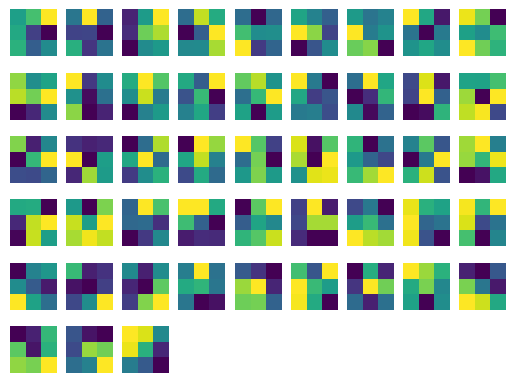

In [ ]:
# Assuming ModeloRC is an instance of your RedConvolucional model
ModeloRC = RedConvolucional()

import matplotlib.pyplot as plt
import numpy as np
def visualize_conv_layer_weights(layer, cmap='viridis'):
    weights = layer.weight.data.cpu().numpy()
    num_filters = weights.shape[0]

    # Determine the number of rows and columns for subplots
    rows = int(np.sqrt(num_filters))
    cols = num_filters // rows + 1

    # Visualize the weights of each filter
    for i in range(num_filters):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(weights[i, 0], cmap=cmap)
        plt.axis('off')

    plt.show()

# Load the state dictionary into the model
state_dict = torch.load('/content/modelo_gatoperro.pt')
ModeloRC.load_state_dict(state_dict)
ModeloRC = ModeloRC.to('cuda')

# Visualize the weights of each convolutional layer

visualize_conv_layer_weights(ModeloRC.conv3)# poner que capa quiers visuzlar

